# AI Lab: Blokus


## Tile Detection

- Detection Workflow (src.detection)
  1. Board Segmentation (board_seg)
  2. Normalization (normalization)
  3. Grid Generation (grid)


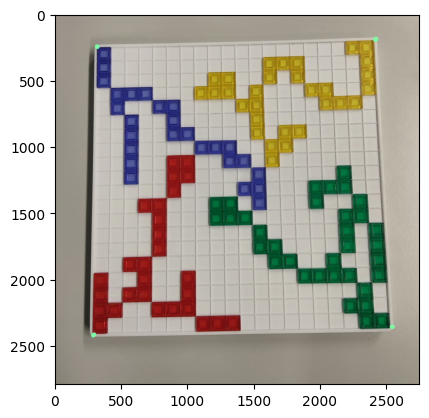

In [16]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import matplotlib.pyplot as plt
import src.detection

image_path = "readme_files/input.png"

image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

- For minimum coding, use `detection.detect(...)`



0: 640x640 1 board, 371.3ms
Speed: 8.6ms preprocess, 371.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


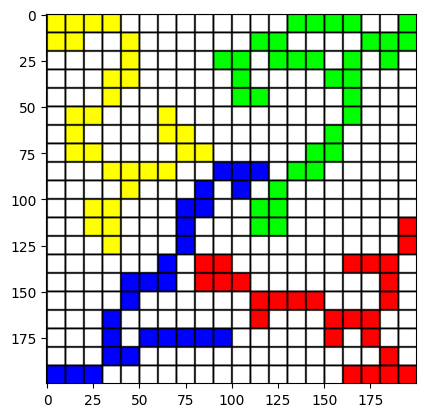

In [17]:
main_grid = src.detection.detect(image, rgyb_thres=(167, 107, 160, 97))
main_img = src.detection.generate_image(main_grid)
plt.imshow(cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB))

### Board Segmentation

- Segmentation Process
  - Get mask from model
  - Crop image using the mask
  - Perspective transformation on the cropped image 


0: 640x640 1 board, 363.6ms
Speed: 8.2ms preprocess, 363.6ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


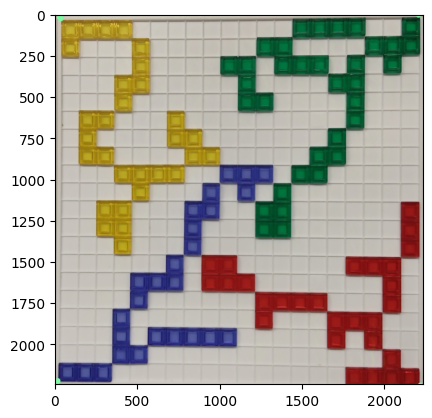

In [18]:
from src.detection import board_seg


img = image.copy()
img = cv2.bilateralFilter(img, 9, 75, 75)
img_segmented = board_seg.board_seg_by_model(img, "models/board_seg.pt")
plt.imshow(cv2.cvtColor(img_segmented, cv2.COLOR_BGR2RGB))

### Image Normalization

- Normalization Process
  - Resize
  - Color Correction
  - Color Mapping

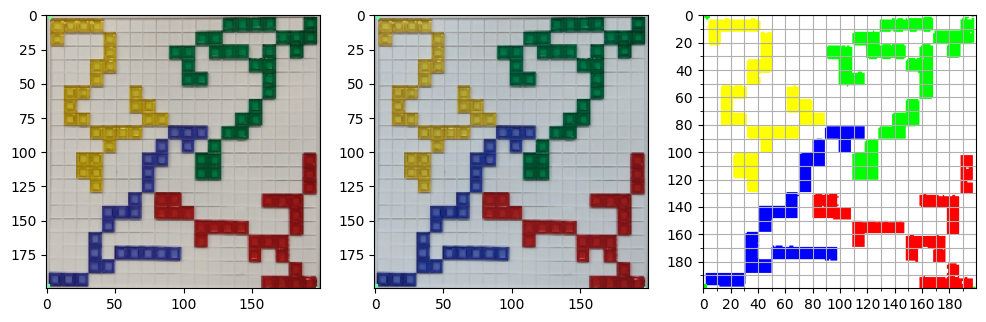

In [19]:
from src.detection import normalization
import src.utils as utils

fig, axes = plt.subplots(1, 3, figsize=(12, 12))

img = cv2.resize(img_segmented, (200, 200))
ax = axes[0]
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = normalization.__color_correction(img)
ax = axes[1]
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

rgyb_thres = (167, 107, 167, 97)
img_normalized = normalization.__color_mapping(img, rgyb_thres)
ax = axes[2]
utils.ax_grid_setting(ax)
ax.imshow(cv2.cvtColor(img_normalized, cv2.COLOR_BGR2RGB))

### Split Image into Grid

- Grid Generation Steps
  - Split the image into 20x20
  - Get dominant color from each grid

Counter({EMPTY: 282, GREEN: 34, YELLOW: 30, RED: 28, BLUE: 26})


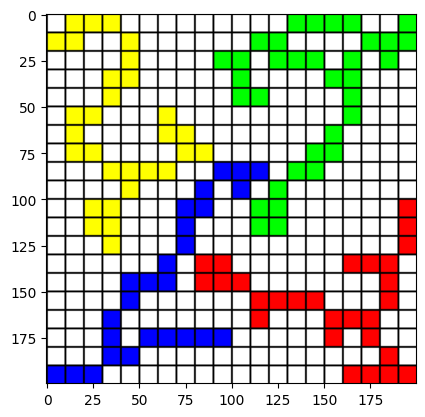

In [20]:
from src.detection import grid
from collections import Counter

color_grid = grid.generate_grid(img_normalized)
print(Counter(color_grid.flatten()))

img_grid = grid.generate_image(color_grid)
plt.imshow(cv2.cvtColor(img_grid, cv2.COLOR_BGR2RGB))

## Recommendation

- Recommendation Process
  - Restore game state using detected grid
  - Apply algorithm to get next move

In [21]:
pos_dict = utils.get_coordinates(color_grid)
for key in pos_dict:
    print(f"{key:<6}", *pos_dict[key][:10], sep="\t")

EMPTY 	[0 0]	[0 4]	[0 5]	[0 6]	[0 7]	[0 8]	[0 9]	[ 0 10]	[ 0 11]	[ 0 12]
RED   	[10 19]	[11 19]	[12 19]	[13  8]	[13  9]	[13 16]	[13 17]	[13 18]	[14  8]	[14  9]
GREEN 	[ 0 13]	[ 0 14]	[ 0 15]	[ 0 16]	[ 0 19]	[ 1 11]	[ 1 12]	[ 1 17]	[ 1 18]	[ 1 19]
BLUE  	[8 9]	[ 8 10]	[ 8 11]	[9 8]	[ 9 10]	[10  7]	[10  8]	[11  7]	[12  7]	[13  6]
YELLOW	[0 1]	[0 2]	[0 3]	[1 0]	[1 1]	[1 4]	[2 4]	[3 3]	[3 4]	[4 3]


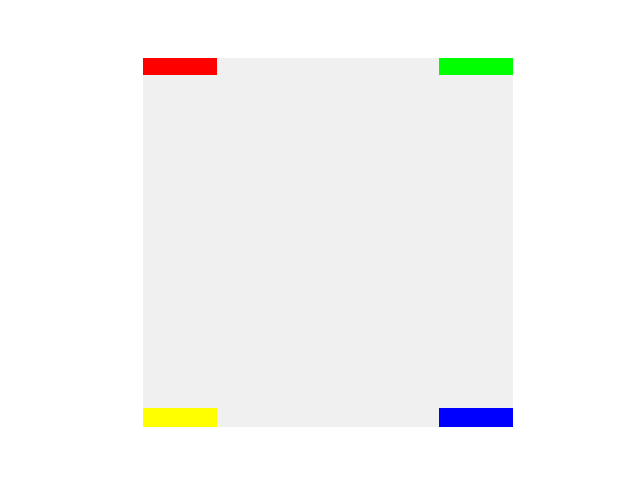

In [1]:
%matplotlib widget
from src.game.ui import GameContext, render_pyplot
from src.types.tiles import SquareColor

players = [
    SquareColor.RED,
    SquareColor.GREEN,
    SquareColor.BLUE,
    SquareColor.YELLOW,
]
game_state = {
    SquareColor.RED: int(
        "11110000000000000000".ljust(400, "0"),
        2,
    ),
    SquareColor.GREEN: int(
        "00000000000000001111".ljust(400, "0"),
        2,
    ),
    SquareColor.BLUE: int(
        "00000000000000001111".rjust(400, "0"),
        2,
    ),
    SquareColor.YELLOW: int(
        "11110000000000000000".rjust(400, "0"),
        2,
    ),
}
render_pyplot(GameContext(players, game_state))

In [2]:
!jupyter nbconvert --to markdown readme.ipynb

[NbConvertApp] Converting notebook readme.ipynb to markdown
[NbConvertApp] Support files will be in readme_files\
[NbConvertApp] Writing 8082 bytes to readme.md
